In [114]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import random
from kneed import KneeLocator
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score


In [115]:
COLORS = [
  "blue",
  "red",   
  "forestgreen",
  "purple",
  "black",
  "orange",
  "gold",
  "cyan",
  "lime",
  "darkgray",
  "crimson",
  "deeppink",
  "magenta",
  "lightpink",
  "indigo",
  "cornflowerblue",
  "deepskyblue",
  "darkcyan",
  "aquamarine",
  "mediumaquamarine",
  "olive",
  "khaki",
  "tan",
  "yellow",
  "chocolate"
]

In [116]:

clusters = [3,5,10,15,20,25,50]
datasets = []
for c in clusters:
    X, y = make_blobs(n_samples=10*c,n_features=2,centers=c,cluster_std=0.3,center_box=(-2*c,2*c))
    datasets.append((X,y))

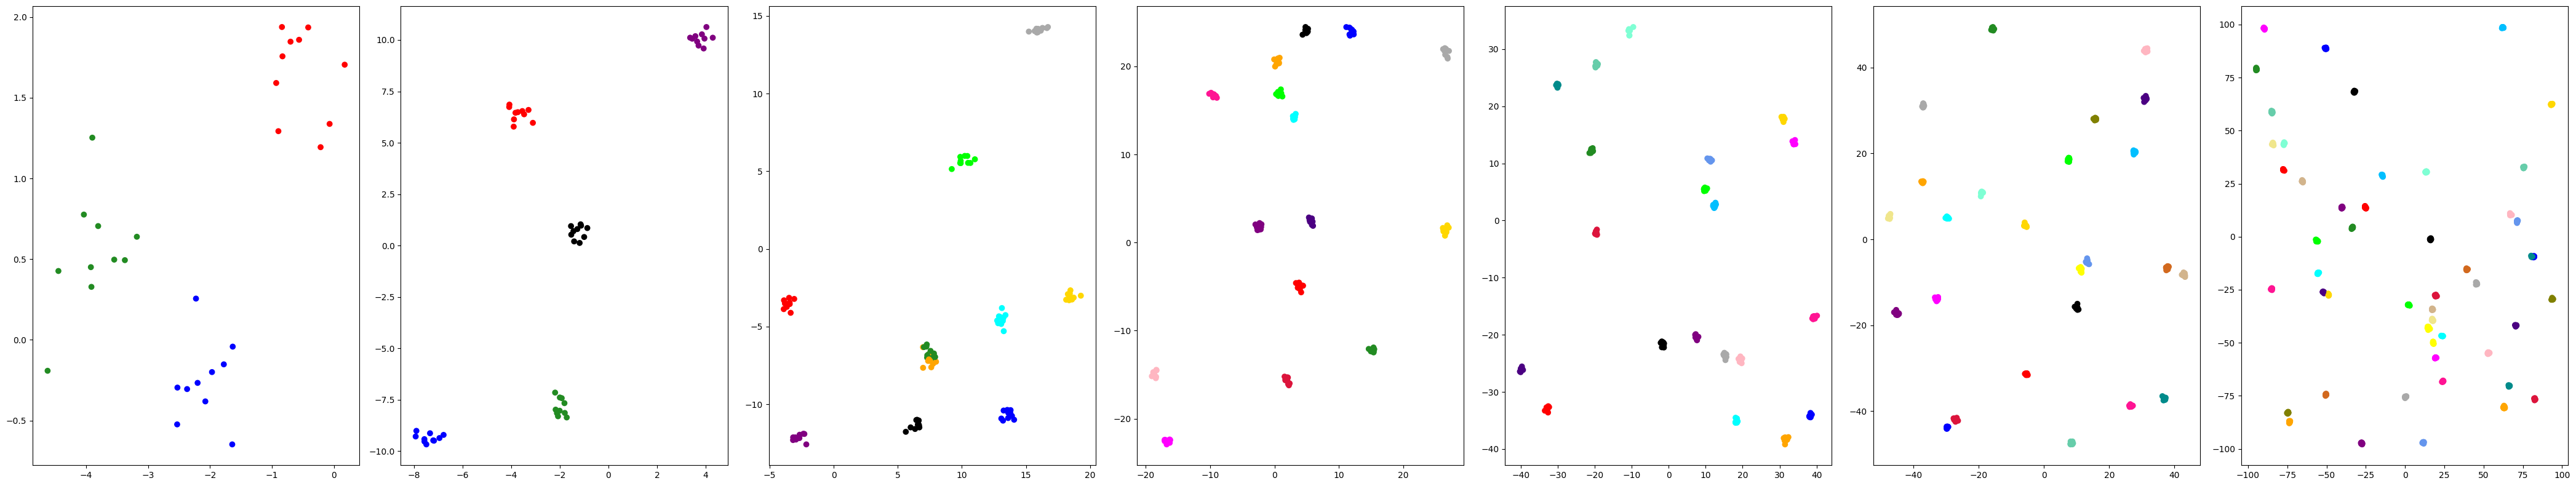

In [117]:
fig, ax = plt.subplots(1,len(datasets),figsize=(6*len(datasets),8))
for i, cls in enumerate(datasets):
    X, y = cls
    ax[i].scatter(x=X[:,0],y=X[:,1],c=[COLORS[i%25] for i in y])

plt.tight_layout()
plt.show()

In [118]:
scores = {
  "elbow": {i: [] for i in range(len(datasets))}, 
  "calinski-harabasz": {i: [] for i in range(len(datasets))}, 
  "davies-bouldin": {i: [] for i in range(len(datasets))}, 
  "silhouette": {i: [] for i in range(len(datasets))}
  }

number_clusters = {
  "elbow": np.empty(len(datasets)), 
  "calinski-harabasz": np.empty(len(datasets)), 
  "davies-bouldin": np.empty(len(datasets)), 
  "silhouette": np.empty(len(datasets))
}


In [119]:
for i, cls in enumerate(datasets):
    X, y = cls
    for k in range(2, (clusters[i]+5)):
        km = KMeans(n_clusters=k,n_init='auto').fit(X)
        labels = km.labels_
        scores["elbow"][i].append(km.inertia_)
        scores["calinski-harabasz"][i].append(calinski_harabasz_score(X, labels))
        scores["davies-bouldin"][i].append(davies_bouldin_score(X, labels))
        scores["silhouette"][i].append(silhouette_score(X, labels))
    
    number_clusters['elbow'][i] = KneeLocator(range(2, (clusters[i]+5)), scores["elbow"][i], curve='convex', direction='decreasing').knee
    number_clusters['calinski-harabasz'][i] = np.nanargmax(scores["calinski-harabasz"][i])+2
    number_clusters['davies-bouldin'][i] = np.nanargmin(scores["davies-bouldin"][i])+2
    number_clusters['silhouette'][i] = np.nanargmax(scores["silhouette"][i])+2

In [120]:
number_clusters

{'elbow': array([3., 5., 6., 7., 7., 8., 6.]),
 'calinski-harabasz': array([ 3.,  5., 10., 15., 20., 25., 51.]),
 'davies-bouldin': array([ 3.,  5.,  9., 15., 20., 23., 49.]),
 'silhouette': array([ 3.,  5.,  9., 15., 20., 23., 49.])}

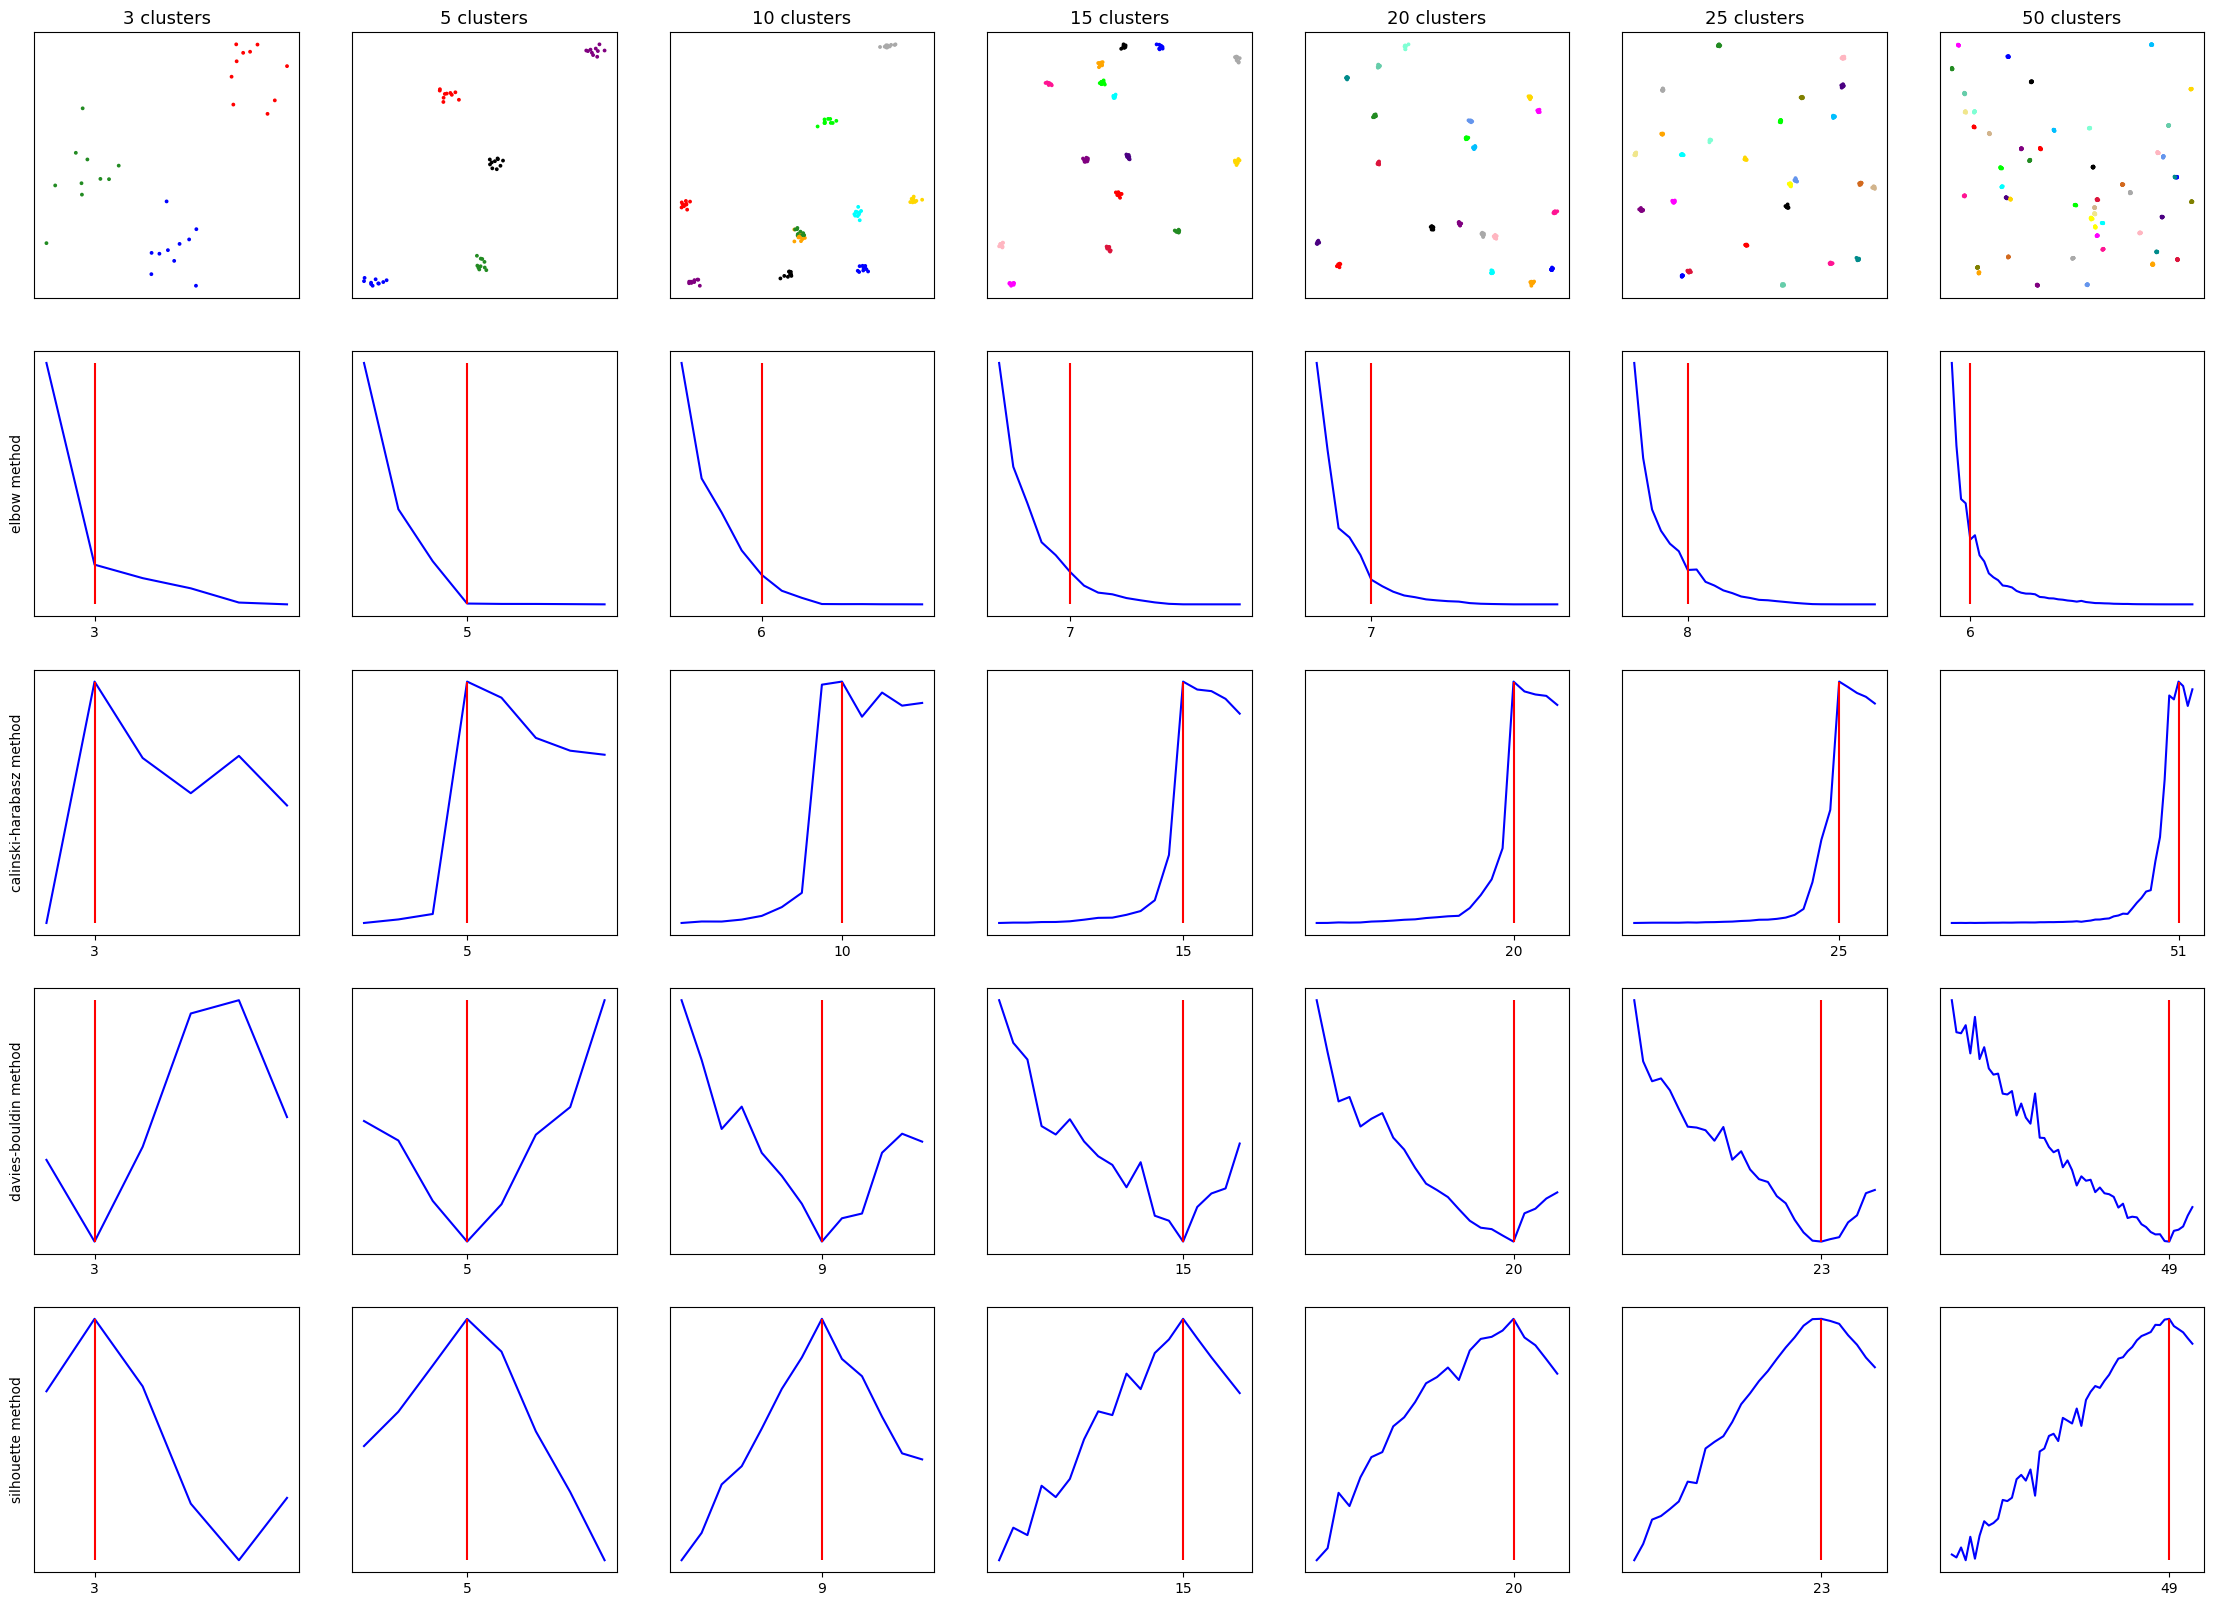

In [121]:
fig, axs = plt.subplots(5,len(datasets), figsize=(4*len(datasets), 20))
#fig.subplots_adjust(wspace = .05, hspace=.05)
for i, cls in enumerate(datasets):
    X, y = cls
    axs[0,i].scatter(x=X[:,0],y=X[:,1],c=[COLORS[i%25] for i in y],s=3)
    axs[0,i].set_title(f"{clusters[i]} clusters", fontsize=13)
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    for idx, key in enumerate(scores.keys()):
        if(i == 0):
            axs[idx+1, 0].set_ylabel('{key} method'.format(key=key))
        axs[idx+1,i].plot(np.arange(2,clusters[i]+5),scores[key][i],'b-')
        axs[idx+1,i].vlines(number_clusters[key][i], np.nanmin(scores[key][i]), np.nanmax(scores[key][i]), color="red")
        axs[idx+1,i].set_xticks(sorted(set([number_clusters[key][i]])))
        axs[idx+1,i].set_yticks([])
plt.show()